# Imports

In [25]:
!pip install tensorflow tensorflow-datasets

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import urllib.request
from PIL import Image
import io

# Dataset

In [27]:
import tensorflow_datasets as tfds

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Load cat vs dog dataset from TFDS
dataset, info = tfds.load(
    "cats_vs_dogs",
    with_info=True,
    as_supervised=True,
    split=["train[:80%]", "train[80%:]"]   # split
)

train_ds, val_ds = dataset

# Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(1)
val_ds   = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(1)

class_names = ["Cat", "Dog"]
print("Classes:", class_names)



Classes: ['Cat', 'Dog']


# CNN

In [28]:
model = models.Sequential([
    layers.Input(shape=(150,150,3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # binary classification
])


# Model Training

In [29]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5 # Increased epochs for better training
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.6217 - loss: 0.6432 - val_accuracy: 0.7442 - val_loss: 0.5110
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.7803 - loss: 0.4698 - val_accuracy: 0.7829 - val_loss: 0.4594
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.8275 - loss: 0.3827 - val_accuracy: 0.7984 - val_loss: 0.4427
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.8736 - loss: 0.2986 - val_accuracy: 0.7943 - val_loss: 0.5007
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.9090 - loss: 0.2192 - val_accuracy: 0.7964 - val_loss: 0.5105


#Plot Accuracy Validation & Loss

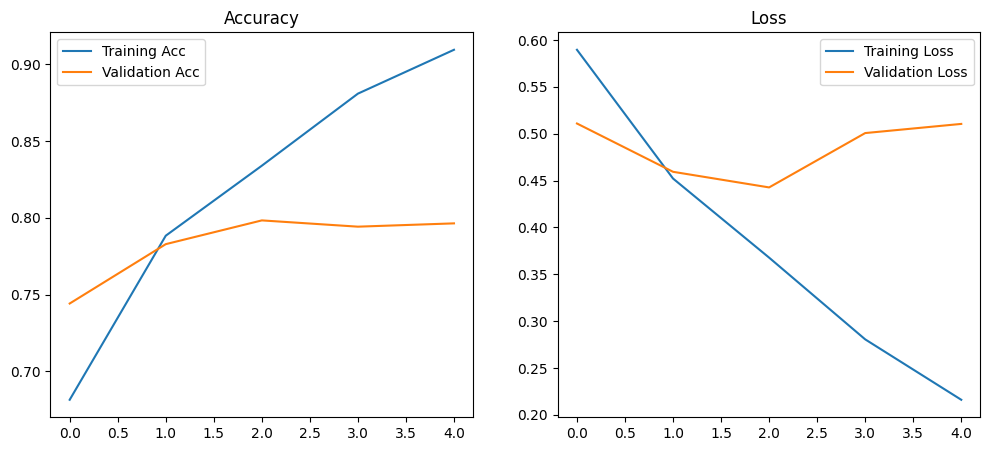

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, label="Training Acc")
plt.plot(epochs, val_acc, label="Validation Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()


# Model Evaluation

146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step
              precision    recall  f1-score   support

         Cat       0.80      0.78      0.79      2280
         Dog       0.79      0.81      0.80      2372

    accuracy                           0.80      4652
   macro avg       0.80      0.80      0.80      4652
weighted avg       0.80      0.80      0.80      4652



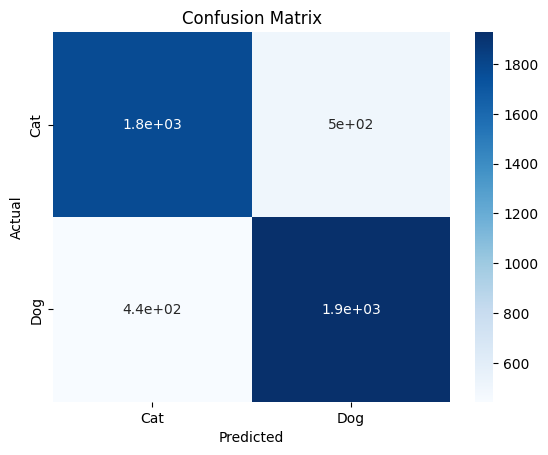

In [31]:
import numpy as np

all_predictions = model.predict(val_ds)

# Extracts true labels from datasets
y_true = np.concatenate([labels.numpy() for images, labels in val_ds], axis=0)

# Process the predictions (thresholding)
y_pred = (all_predictions > 0.5).astype("int32").flatten()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Image Class (url)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


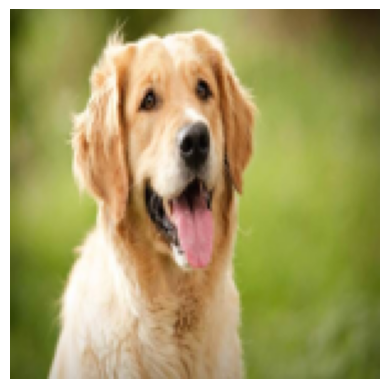

Probabilities -> CAT: 0.00, DOG: 1.00
Prediction: DOG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


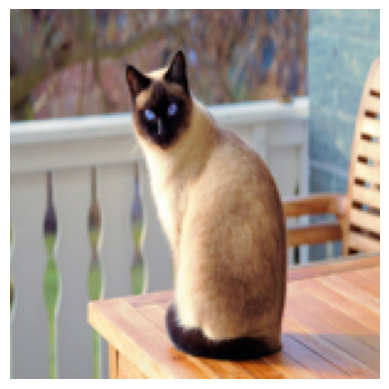

Probabilities -> CAT: 0.61, DOG: 0.39
Prediction: CAT


In [32]:
def predict_from_url(url):

    headers = {'User-Agent': 'Mozilla/5.0'}
    req = urllib.request.Request(url, headers=headers)

    with urllib.request.urlopen(req) as img:
        img_bytes = img.read()

    # Open and preprocess image
    image = Image.open(io.BytesIO(img_bytes)).convert('RGB').resize(IMG_SIZE)
    img_array = np.array(image) / 255.0  # normalizes to [0,1]
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)

    # Show image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # sigmoid or softmax
    if pred.shape[-1] == 1:
        cat_prob = 1 - pred[0][0]
        dog_prob = pred[0][0]
        print(f"Probabilities -> CAT: {cat_prob:.2f}, DOG: {dog_prob:.2f}")
        print("Prediction:", "DOG" if dog_prob > 0.5 else "CAT")
    else:
        classes = ["CAT", "DOG"]
        print(f"Probabilities -> CAT: {pred[0][0]:.2f}, DOG: {pred[0][1]:.2f}")
        predicted_class = classes[np.argmax(pred[0])]
        print("Prediction:", predicted_class)
urls = [
    "https://www.nylabone.com/-/media/project/oneweb/nylabone/images/dog101/10-intelligent-dog-breeds/golden-retriever-tongue-out.jpg",
    "https://images.pexels.com/photos/326875/pexels-photo-326875.jpeg?cs=srgb&dl=adorable-animal-blur-326875.jpg",

]

for url in urls:
    predict_from_url(url)
# (dog image) https://143587181.fs1.hubspotusercontent-eu1.net/hub/143587181/hubfs/Most%20Popular%20Dog%20Breeds%20UK-jpg.jpeg?width=1600&height=914&name=Most%20Popular%20Dog%20Breeds%20UK-jpg.jpeg
# (cat image) https://www.vetstreet.com/wp-content/uploads/2022/09/shutterstock_2161329129-scaled.jpg